<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB
None
             case        site         age  ...         eye       chest       belly
count  101.000000  101.000000  101.000000  ...  101.000000  101.000000  101.000000
mean    52.762376    3.673267    3.821782

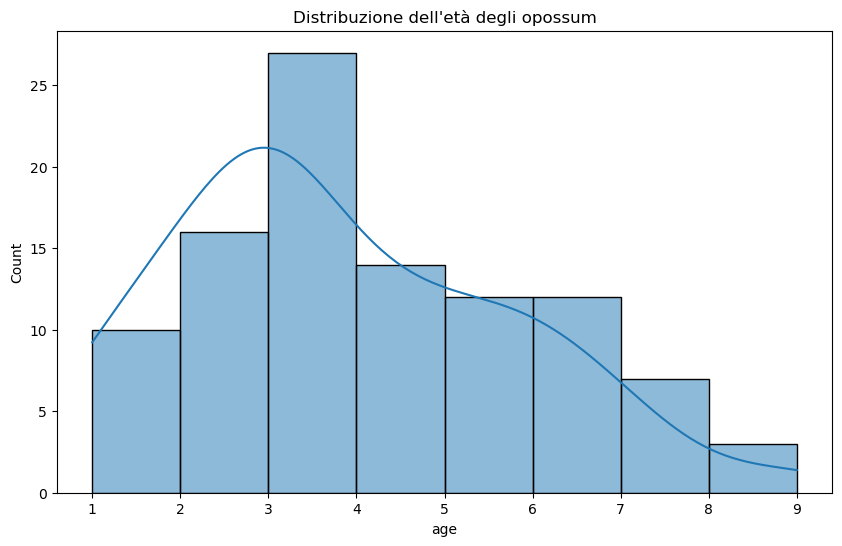

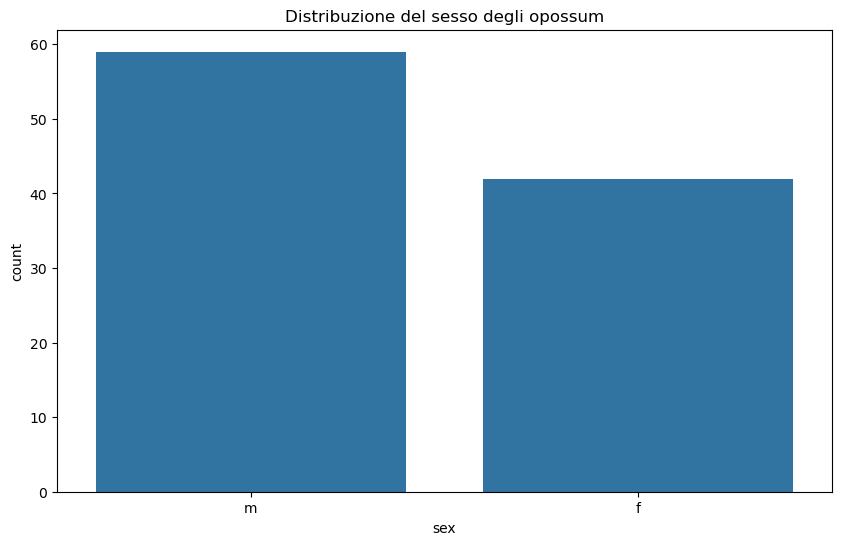

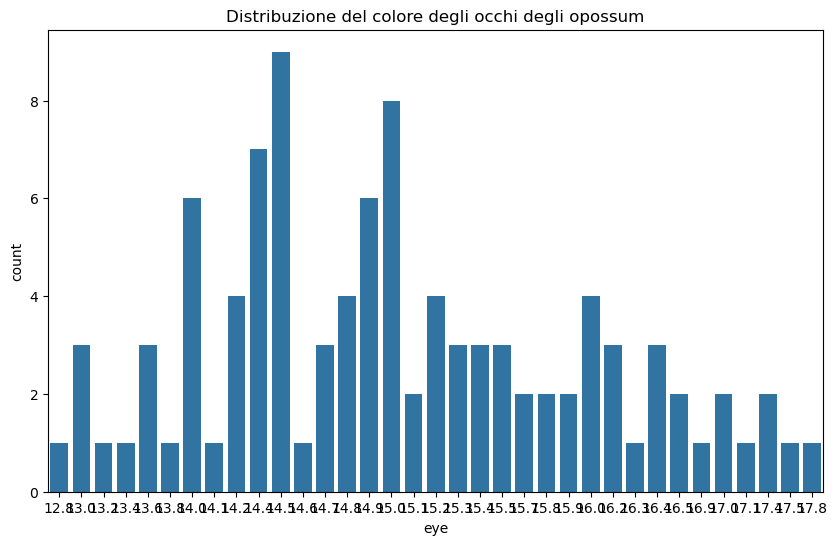

Mean Squared Error: 4.64
R-squared: -0.03
absolute: 0.02


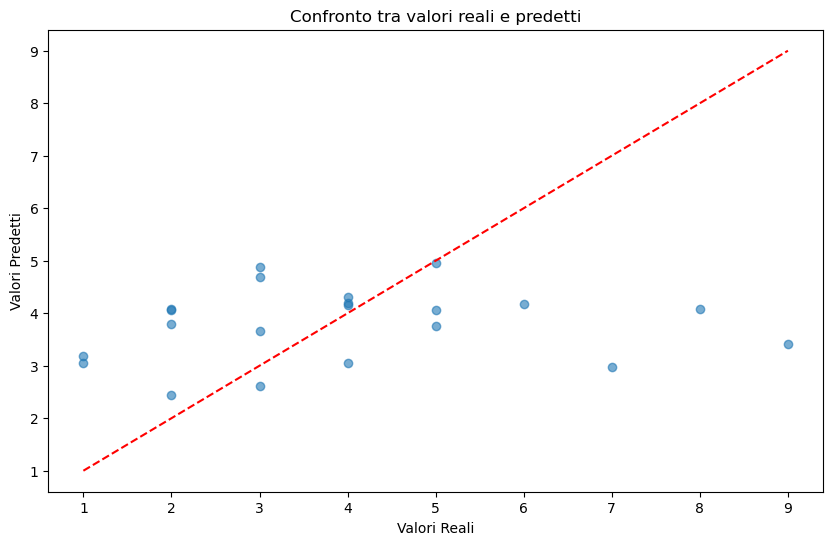

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, d2_absolute_error_score

# Lettura del file CSV
file_path = '../0.datasets/possum.csv'
df = pd.read_csv(file_path)

# Rimozione dei valori mancanti
df = df.dropna()

# Informazioni sul dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualizzazione della distribuzione dell'età
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title("Distribuzione dell'età degli opossum")
plt.show()

# Visualizzazione della distribuzione del sesso
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title("Distribuzione del sesso degli opossum")
plt.show()

# Visualizzazione della distribuzione del colore degli occhi
plt.figure(figsize=(10, 6))
sns.countplot(x='eye', data=df)
plt.title("Distribuzione del colore degli occhi degli opossum")
plt.show()

# Codifica delle variabili categoriche
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['eye'] = label_encoder.fit_transform(df['eye'])
df['site'] = label_encoder.fit_transform(df['site'])
df['Pop'] = label_encoder.fit_transform(df['Pop'])

# Inizializzazione dello scaler
scaler = StandardScaler()

# Separazione del target e delle feature
y = df['age']
features = df.drop(columns=['age', 'case'])

# Ridimensionamento delle feature
X = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Suddivisione del dataset in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creazione e addestramento del modello di regressione lineare
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Previsione e valutazione del modello
y_pred = model_lr.predict(X_test)

# Calcolo del Mean Squared Error (MSE) e R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = d2_absolute_error_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"absolute: {accuracy:.2f}")

# Visualizzazione delle previsioni
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Confronto tra valori reali e predetti")
plt.show()
